# **Predicting Wine Quality Through Classification and Regression**
#### DSCI 100 Winter T2 Group 006-042

## Introduction:

Consumer selection on wine has been heavily dependent on quality certifications for purchasing decisions and producers have been doing the same for pricing (Cortez et al., 2009). The certification for wine quality is a tedious process, requiring wine experts (connoisseurs) to sample the taste and smell of the wine to determine its quality (Cortez et al., 2009). However, there are biases when conducting these sensory taste tests due to personal preferences of the experts and the complex nature of the human taste bud (Smith and Margolskee, 2001).

We would like to know whether it is possible to obtain an accurate model to predict wine quality based on its chemical properties, ultimately replacing human sensory evaluators.
For this purpose, we use the KNN classification model over a data set containing the chemical properties and quality of 1599 different red wines.

The data set is collected in 2009 by Cortez et al. and has the following 12 variables:

#### Attribute (units):
- Fixed acidity ($g/dm^3$)
- Volatile acidity ($g/dm^3$)
- Citric acid ($g/dm^3$)
- Residual sugar ($g/dm^3$)
- Chlorides ($g/dm^3$)
- Free sulfur dioxide ($mg/dm^3$)
- Total sulfur dioxide ($mg/dm^3$)
- Density ($g/cm^3$)
- pH
- Sulphates ($g/dm^3$)
- Alcohol ($vol.\%$)
- Quality (from 0 to 10)

The quality variable is determined from the range 0-10 based on the evaluations of 3 human assessors.

We will not be using all the given variables for quality prediction, as we find some of the variables correlated, and some not related to the quality. The way we choose the variables is 

## Preliminary Exploratory Data Analysis:

In [31]:
# loading libraries
library(tidyverse)
library(tidymodels)
library(gridExtra)

In [46]:
# reading data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
destination <- "data/red_wine_quality.csv"
download.file(url, destination)

data <- read.csv(destination, head = TRUE, sep = ";")
glimpse(data)

Rows: 1,599
Columns: 12
$ fixed.acidity        <dbl> 7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, 7.…
$ volatile.acidity     <dbl> 0.700, 0.880, 0.760, 0.280, 0.700, 0.660, 0.600,…
$ citric.acid          <dbl> 0.00, 0.00, 0.04, 0.56, 0.00, 0.00, 0.06, 0.00, …
$ residual.sugar       <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 6.1…
$ chlorides            <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0.069,…
$ free.sulfur.dioxide  <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 15, 17, 1…
$ total.sulfur.dioxide <dbl> 34, 67, 54, 60, 34, 40, 59, 21, 18, 102, 65, 102…
$ density              <dbl> 0.9978, 0.9968, 0.9970, 0.9980, 0.9978, 0.9978, …
$ pH                   <dbl> 3.51, 3.20, 3.26, 3.16, 3.51, 3.51, 3.30, 3.39, …
$ sulphates            <dbl> 0.56, 0.68, 0.65, 0.58, 0.56, 0.56, 0.46, 0.47, …
$ alcohol              <dbl> 9.4, 9.8, 9.8, 9.8, 9.4, 9.4, 9.4, 10.0, 9.5, 10…
$ quality              <int> 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, …


In [59]:
# cleaning and wrangling data
colnames(data) <- gsub("'.'", "_", names(data))
colnames(data)[colnames(data) %in% c("free_sulfur_dioxide", "total_sulfur_dioxide")] <- c("free_so2", "total_so2")
data
# clean_data <- data %>%
#               mutate(quality = as_factor(quality))
# %>%
#               subset(select = -c(fixed_acidity, volatile_acidity, citric_acid, free_so2))

_____________,________________,___________,______________,_________,___________________,____________________,_______,__,_________,_______,_______
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7


In [51]:
# splitting data
set.seed(7)
clean_data_split <- initial_split(clean_data, prop = 0.5, strata = quality)
train_data <- training(clean_data_split)
test_data <- testing(clean_data_split)

In [35]:
glimpse(train_data)

Rows: 801
Columns: 12
$ fixed.acidity        <dbl> 11.2, 7.4, 7.9, 7.8, 6.7, 7.8, 8.9, 7.4, 8.5, 7.…
$ volatile.acidity     <dbl> 0.280, 0.700, 0.600, 0.580, 0.580, 0.610, 0.620,…
$ citric.acid          <dbl> 0.56, 0.00, 0.06, 0.02, 0.08, 0.29, 0.18, 0.08, …
$ residual.sugar       <dbl> 1.9, 1.9, 1.6, 2.0, 1.8, 1.6, 3.8, 4.4, 2.3, 1.8…
$ chlorides            <dbl> 0.075, 0.076, 0.069, 0.073, 0.097, 0.114, 0.176,…
$ free.sulfur.dioxide  <dbl> 17, 11, 15, 9, 15, 9, 52, 6, 9, 4, 10, 17, 22, 1…
$ total.sulfur.dioxide <dbl> 60, 34, 59, 18, 65, 29, 145, 29, 67, 11, 37, 82,…
$ density              <dbl> 0.9980, 0.9978, 0.9964, 0.9968, 0.9959, 0.9974, …
$ pH                   <dbl> 3.16, 3.51, 3.30, 3.36, 3.28, 3.26, 3.16, 3.38, …
$ sulphates            <dbl> 0.58, 0.56, 0.46, 0.57, 0.54, 1.56, 0.88, 0.50, …
$ alcohol              <dbl> 9.8, 9.4, 9.4, 9.5, 9.2, 9.1, 9.2, 9.0, 9.4, 9.5…
$ quality              <fct> 6, 5, 5, 7, 5, 5, 5, 4, 5, 5, 5, 5, 6, 5, 6, 5, …


In [36]:
# summarizing data
train_data_mean_summary <- train_data %>%
                           mutate(quality = as.numeric(quality)) %>%
                           map_dfr(mean, na.rm = TRUE)

colnames(train_data_mean_summary) <- paste("mean", colnames(train_data_mean_summary), sep = "_")

train_data_quality_summary <- train_data %>%
                              group_by(quality) %>%
                              summarize(count = n(),
                                        proportion = n() / nrow(train_data) * 100)

`summarise()` ungrouping output (override with `.groups` argument)



In [37]:
# mean of predictor variables and classifier
train_data_mean_summary

mean_fixed.acidity,mean_volatile.acidity,mean_citric.acid,mean_residual.sugar,mean_chlorides,mean_free.sulfur.dioxide,mean_total.sulfur.dioxide,mean_density,mean_pH,mean_sulphates,mean_alcohol,mean_quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.379401,0.5236267,0.2821473,2.563109,0.08929213,15.99438,46.72097,0.9967475,3.304257,0.6739201,10.4283,3.652934


In [38]:
# count of classifier
train_data_quality_summary

quality,count,proportion
<fct>,<int>,<dbl>
3,5,0.6242197
4,24,2.9962547
5,342,42.6966292
6,315,39.3258427
7,103,12.8589263
8,12,1.4981273


In [39]:
# scaling data
train_data_scaled <- train_data %>%
                     mutate_at(vars(-quality, -pH),
                               ~(scale(., center = TRUE) %>% as.vector))

In [43]:
# visualizing data
alcohol_plot <- train_data %>%
                ggplot(aes(x = quality, y = alcohol)) +
                geom_boxplot() +
                theme(text = element_text(size = 14))
volatile_acidity_plot <- train_data %>%
                      ggplot(aes(x = quality, y = volatile_acidity)) +
                      geom_boxplot() +
                      theme(text = element_text(size = 14))
sulphates_plot <- train_data %>%
                  ggplot(aes(x = quality, y = sulphates)) +
                  geom_boxplot() +
                  theme(text = element_text(size = 14))
total_so2_plot <- train_data %>%
                  ggplot(aes(x = quality, y = total_so2)) +
                  geom_boxplot() +
                  theme(text = element_text(size = 14))
chlorides_plot <- train_data %>%
                   ggplot(aes(x = quality, y = chlorides)) +
                   geom_boxplot() +
                   theme(text = element_text(size = 14))
residual_sugar_plot <- train_data %>%
                       ggplot(aes(x = quality, y = residual_sugar)) +
                       geom_boxplot() +
                       theme(text = element_text(size = 14))

train_data_quality_summary_plot <- train_data_quality_summary %>%
                                   ggplot(aes(x = quality, y = count)) +
                                   geom_bar(stat = "identity") +
                                   labs(x = "Quality", y = "Count") +
                                   theme(text = element_text(size = 14))

In [42]:
# predictor variables boxplots
options(repr.plot.width = 24, repr.plot.height = 4)
summary_plot <- grid.arrange(alcohol_plot,
                             volatile_acidity_plot,
                             sulphates_plot,
                             total_so2_plot,
                             residual_sugar_plot,
                             chlorides_plot,
                             nrow=1)

ERROR: Error in FUN(X[[i]], ...): object 'volatile_acidity' not found


Boxplot of predictor values and quality, which we can use to potentially classify quality based off of where the predictor values lie by forming a line of best fit along the means and quartiles.

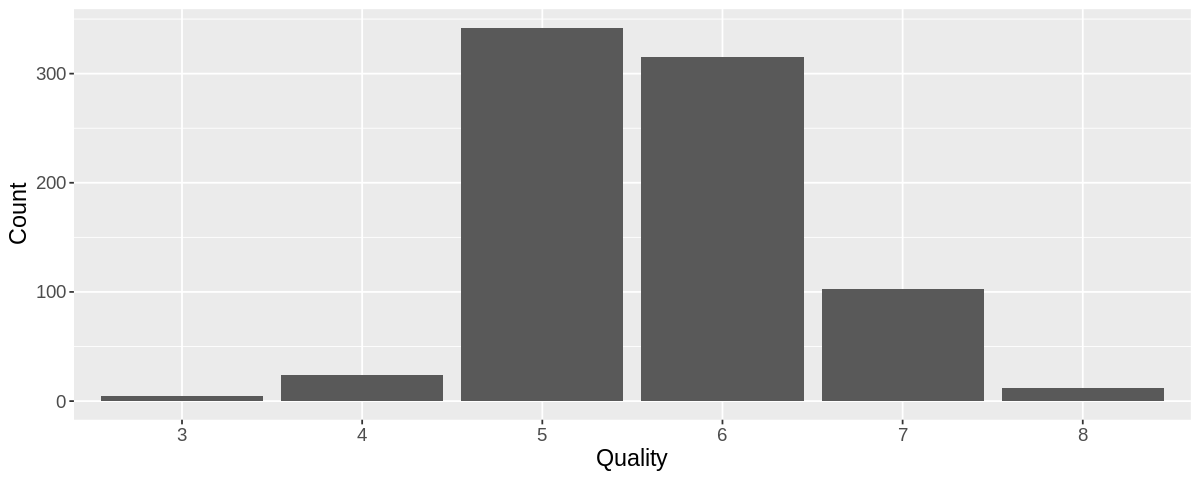

In [38]:
# count of classifier plot
options(repr.plot.width = 10, options.repr.plot.height = 15)
train_data_quality_summary_plot

Counts for every observable quality in the training dataset.

## Methods:

Our data analysis will be conducted using a classification model (specifically k-nearest-neighbours). We will be using alcohol, volatile acidity, sulphates, total sulfur dioxide, residual sugar and chlorides — obtained from variable parameter selection — as our predictors to help predict and classify wine quality. When analyzing the outcomes, our results will be visualized using a bar plot.
 


## Expected Outcomes and Significance:

We expect to see that our chosen predictors will greatly influence the quality of wine depending on their relative proportions. That is, we expect that all of our predictors have individual influence over the wine quality, and when combined in a model, each predictor acts to amplify the accuracy of the quality predictions.

The impact of these findings may help improve the wine industry. In recent years, this industry is growing and thus there is an increased interest in investing in more innovative techniques that may enhance wine production as well as its selling. Our work aims to integrate subjective rankings to objective measures so that people can extrapolate these findings and make better quality wines. These variables are able to be controlled and manipulated during production. Thus, our findings may be used by oenologists to improve their wine production.

Future questions that may arise include those concerned over what other potential factors may influence the quality of wine or whether the interaction between variables has a greater impact than considered singularly. Further assessment may attempt to discover relationships between variables that together produce a stronger prediction of wine quality. This analysis may also raise the question of whether subjective experience or objective measures matter most. It is possible that personal and sensory experiences play a larger role in shaping wine quality rankings. Therefore, further analysis may explore these subjective factors.


## Working Data Analysis:

In [39]:
set.seed(7)

# determining predictors
data_subset <- train_data_scaled
names <- colnames(data_subset %>% select(-quality))
example_formula <- paste("quality", "~", paste(names, collapse="+"))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 5-fold cross-validation object
data_vfold <- vfold_cv(data_subset, v = 5, strata = quality)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("quality", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        data_recipe <- recipe(as.formula(model_string), 
                                data = data_subset) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(data_recipe) %>%
          add_model(spec) %>%
          tune_grid(resamples = data_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

! Fold2: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold2: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold2: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold2: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold4: internal: No observations were detected in `t

size,model_string,accuracy
<int>,<chr>,<dbl>
1,quality ~ alcohol,0.5268789
2,quality ~ alcohol+volatile_acidity,0.5680280
3,quality ~ alcohol+volatile_acidity+sulphates,0.5854891
4,quality ~ alcohol+volatile_acidity+sulphates+total_so2,0.6017469
5,quality ~ alcohol+volatile_acidity+sulphates+total_so2+chlorides,0.6079503
6,quality ~ alcohol+volatile_acidity+sulphates+total_so2+chlorides+residual_sugar,0.6117003
7,quality ~ alcohol+volatile_acidity+sulphates+total_so2+chlorides+residual_sugar+free_so2,0.5955047
8,quality ~ alcohol+volatile_acidity+sulphates+total_so2+chlorides+residual_sugar+free_so2+fixed_acidity,0.5954891
9,quality ~ alcohol+volatile_acidity+sulphates+total_so2+chlorides+residual_sugar+free_so2+fixed_acidity+citric_acid,0.5904814


In [59]:
# creating a model

predictor_train_data <- train_data %>% select(c(quality, alcohol, volatile_acidity, sulphates, total_so2, residual_sugar, chlorides))

recipe <- recipe(quality ~., data = predictor_train_data) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
set_engine("kknn") %>%
set_mode("classification")

vfold <- vfold_cv(predictor_train_data, v = 5, strata = quality)

# code below yeilded a very variable k plot of accuracy, best k's = 60-75 best. All a accuracies around 0.56.
# so i limited it to a smaller range.

# k_vals <- tibble(neighbors = seq(1,100,5))

# train_fit <- workflow() %>%
# add_recipe(recipe) %>%
# add_model(model) %>%
# tune_grid(resamples = vfold, grid = k_vals) %>%
# collect_metrics() %>%
# filter(.metric == "accuracy") %>%
# arrange(mean)

# tail(train_fit)

# k_plot <- ggplot(train_fit, aes(x=neighbors, y=mean)) + geom_point() + geom_line()
# k_plot

# code below yeilded a fairly variable k plot of accuracy, but k = 35 likely best for preventing under and overfitting.
# k = 29 also does not vary as much from nearby points.

# k_vals_2 <- tibble(neighbors = seq(60,90,2))

# train_fit_2 <- workflow() %>%
# add_recipe(recipe) %>%
# add_model(model) %>%
# tune_grid(resamples = vfold, grid = k_vals_2) %>%
# collect_metrics() %>%
# filter(.metric == "accuracy") %>%
# arrange(mean)

# tail(train_fit_2)

# k_plot_2 <- ggplot(train_fit_2, aes(x=neighbors, y=mean)) + geom_point() + geom_line()
# k_plot_2

# using best model of k = 73, with accuracy 0.56.

best_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 35) %>%
set_engine("kknn") %>%
set_mode("classification")

train_fit <- workflow() %>%
add_recipe(recipe) %>%
add_model(best_model) %>%
fit(predictor_train_data)

predict_accuracy <- predict(train_fit, test_data) %>%
bind_cols(test_data) %>%
metrics(truth = quality, estimate = .pred_class) %>%
filter(.metric == "accuracy")
predict_accuracy

# above code gives 0.5957447 evaluation accuracy which is better than chance alone.


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.6002506


In [60]:
# Wenwen did this... thx Wenwen :D

# creating model using variable support vector machine from paper

train_data_SVM <- train_data %>% 
    select(c(quality, fixed_acidity, alcohol, sulphates, total_so2, free_so2, volatile_acidity, pH))

SVM_recipe <- recipe(quality ~., data = train_data_SVM) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

SVM_model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification") 

SVM_vfold <- vfold_cv(train_data_SVM, v = 5, strata = quality)

k_value <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#SVM_results <- workflow() %>% 
#    add_recipe(SVM_recipe) %>% 
#    add_model(SVM_model) %>% 
#    tune_grid(resamples = SVM_vfold, grid = k_value) %>% 
#    collect_metrics()

#k_accuracies <- SVM_results %>% 
#    filter(.metric == "accuracy")

#k_accuracies

#accuracy_vs_k <- ggplot(k_accuracies, aes(x = neighbors, y = mean)) +
#    geom_point() +
#    geom_line() +
#    labs(x = "Neighbors", y = "Accuracy Estimate") +
#    theme(text = element_text(size = 12))

#accuracy_vs_k

# from the graph, we select 75 as the k value because it has a relatively high accuracy estimate and is consistent with nearby values

best_SVM_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 75) %>%
    set_engine("kknn") %>%
    set_mode("classification")

SVM_fit <- workflow() %>%
    add_recipe(SVM_recipe) %>%
    add_model(best_SVM_model) %>%
    fit(data = train_data_SVM)

SVM_predictions <- predict(SVM_fit, test_data) %>%
    bind_cols(test_data) %>%
    metrics(truth = quality, estimate = .pred_class) %>%
    filter(.metric == "accuracy")
SVM_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5989975


## References

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., Reis, J. (2009). Modeling wine 
	preferences by data mining from physicochemical properties. Decision 
	Support Systems. 47, 547-553. https://doi.org/10.1016/j.dss.2009.05.016.
 
Smith, D. V., & Margolskee, R. F. (2001). Making Sense of Taste. Scientific 
	American, 284, 32–39. http://www.jstor.org/stable/26059127
